# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Laptop Prices Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)
<img src="DS1_logo.jpg" alt="DS1 Logo" width="150"/>

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

<div class="alert alert-info alert-warning ">

# <span style=" color:red"> Laptop Prices Project 
</span>

<div class="alert alert-info alert-warning ">

# <span style=" color:red"> “Laptop fiyatları üzerine gerçekleştireceğimiz bu keşifsel veri analizi (EDA- exploratory data analysis) projesine hoş geldiniz. Bu çalışmada kullanılan veri seti; marka, tip, ekran boyutu, donanım özellikleri ve fiyat gibi çeşitli özellikleri içermektedir. Analiz kapsamında veri temizleme, görselleştirme ve temel istatistiksel yöntemlerle, laptop fiyatlarını şekillendiren en önemli değişkenler hakkında değerli içgörüler elde edilmesi amaçlanmaktadır.”
</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df0 = pd.read_csv('laptop_data.csv') 
df = df0.copy()

In [5]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1303.0,651.000000,376.288010,0.00,325.50,651.00,976.5000,1302.00
Inches,1303.0,15.017191,1.426304,10.10,14.00,15.60,15.6000,18.40
Price,1303.0,59870.042910,37243.201786,9270.72,31914.72,52054.56,79274.2464,324954.72


In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)  # tekrar eden index sütunu kaldırdık

In [9]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [10]:
df.columns = df.columns.str.capitalize()

In [11]:
df.rename(columns={
    'Typename': 'Type',
    'Screenresolution': 'Resolution',
    'Ram': 'RamGB',
    'Weight': 'Kg',
    'Price' : 'PriceTL',
}, inplace=True)

In [12]:
df.columns

Index(['Company', 'Type', 'Inches', 'Resolution', 'Cpu', 'RamGB', 'Memory',
       'Gpu', 'Opsys', 'Kg', 'PriceTL'],
      dtype='object')

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Data Cleaning: 

In [13]:
df.duplicated().sum()

29

In [14]:
df = df.drop_duplicates(ignore_index = True)  

In [15]:
df.isnull().sum()

Company       0
Type          0
Inches        0
Resolution    0
Cpu           0
RamGB         0
Memory        0
Gpu           0
Opsys         0
Kg            0
PriceTL       0
dtype: int64

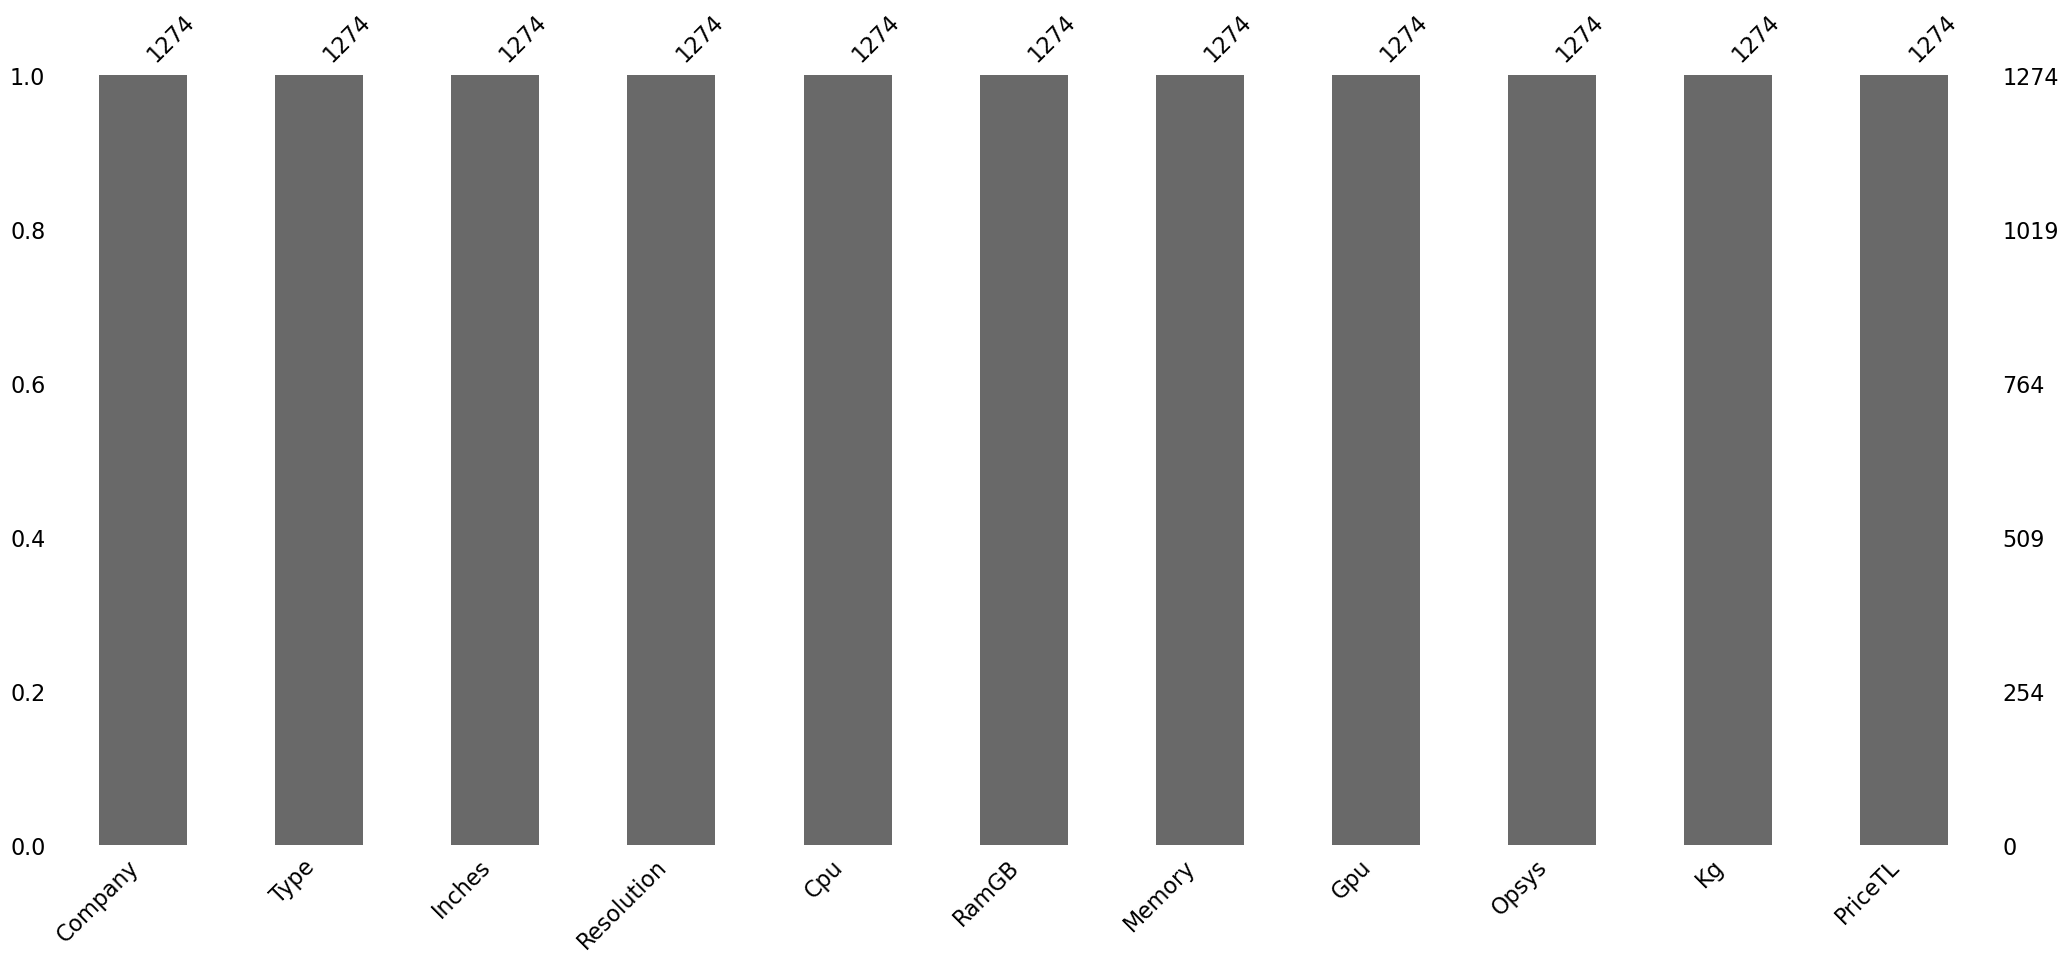

In [16]:
import missingno as msno
msno.bar(df);

<div class="alert alert-block alert-success">

### <span style=" color:red"> Standardize data formats:

- Her sütunun veri türlerini uygun biçimlere dönüştürüp, sayısal değerlerin yanındaki ifadeleri temizliyoruz.

In [17]:
df.head(10)

,Company,Type,Inches,Resolution,Cpu,RamGB,Memory,Gpu,Opsys,Kg,PriceTL
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [18]:
df['RamGB'] = df['RamGB'].str.replace('GB', '').astype(int)

In [19]:
df['Kg'] = df['Kg'].str.replace('kg', '').astype(float)


In [20]:
df['PriceTL'] = df['PriceTL'].round(2)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1274.0,15.022449,1.429940,10.10,14.000,15.60,15.60,18.40
RamGB,1274.0,8.444270,5.098291,2.00,4.000,8.00,8.00,64.00
Kg,1274.0,2.040400,0.669444,0.69,1.500,2.04,2.31,4.70
PriceTL,1274.0,60503.185071,37333.223017,9270.72,32495.605,52693.92,79773.48,324954.72


<div class="alert alert-block alert-success">

### <span style=" color:red"> Clean categorical columns:

- Company, Type ve Opsys sütunlarında tutarlı biçimlendirme sağlayacağız, Opsys sütunundaki benzer işletim sistemi türlerini gruplayacağız.

In [22]:
print(df['Company'].unique())

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


In [23]:
print(df['Type'].unique())

['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']


In [24]:
print(df['Opsys'].unique())

['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


In [25]:
df['Opsys'] = df['Opsys'].str.lower().replace({
    'windows 10': 'Windows',
    'windows 10 s': 'Windows',
    'windows 7': 'Windows',
    'macos': 'Mac',
    'mac os x': 'Mac',
    'linux': 'Linux',
    'chrome os': 'Chrome os',
    'android': 'Android',
    'no os': 'No os'
})

In [26]:
print(df['Opsys'].value_counts())

Opsys
Windows      1100
No os          66
Linux          58
Chrome os      27
Mac            21
Android         2
Name: count, dtype: int64


<div class="alert alert-block alert-success">

### <span style=" color:red"> Split compound columns:

- Çözünürlük (ör. Full HD, 4K) bilgilerini ayrıştıracağız,
- Dokunmatik ekran (Evet/Hayır) olarak ayıracağız,
- Cpu ve Gpu sütunlarından da üretici veya çekirdek türü gibi ayrıntıları çıkaracağız.

In [27]:
df['Resolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [28]:
def extract_resolution_label(text):
    text = text.lower()
    if '3840x2160' in text or '4k' in text:
        return '4K'
    elif '3200x1800' in text or 'quad hd' in text:
        return 'Quad HD+'
    elif '2560x1440' in text:
        return 'QHD'
    elif '1920x1200' in text:
        return 'WUXGA'
    elif '1920x1080' in text or 'full hd' in text:
        return 'Full HD'
    elif '1600x900' in text:
        return 'HD+'
    elif '1366x768' in text:
        return 'HD'
    elif '2560x1600' in text:
        return 'WQXGA'
    elif '2880x1800' in text or '2304x1440' in text:
        return 'Retina'
    elif '2256x1504' in text or '2736x1824' in text or '2400x1600' in text:
        return 'Other High'
    elif '1440x900' in text:
        return 'WXGA+'
    else:
        return 'Other'
# Standart dışı, yüksek çözünürlüklü ekranlar oldukları için "Other High" etiketiyle ayırdık

In [29]:
df['Resolution_Label'] = df['Resolution'].apply(extract_resolution_label)

In [30]:
df['Resolution_Label'].unique() 

array(['WQXGA', 'WXGA+', 'Full HD', 'Retina', 'HD', 'Quad HD+', 'WUXGA',
       'Other High', '4K', 'QHD', 'HD+'], dtype=object)

In [31]:
df['Touchscreen'] = df['Resolution'].str.contains('Touchscreen|touchscreen', case=False).map({True: 'Yes', False: 'No'})

In [32]:
df['Touchscreen'].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [34]:
df['Cpu_Brand'] = df['Cpu'].str.extract(r'(^\w+)') # Her satırda, baştaki ilk kelimeyi (boşluğa kadar olan kısmı) seçer.

df['Cpu_Type'] = df['Cpu'].str.extract(r'(Core i[3579]|Celeron|Atom|Pentium)') 
# Düzenli ifade (regex) ile, metin içinde "Core i3", "Core i5", "Core i7", "Core i9", "Celeron", "Atom" veya "Pentium" geçen 
# kısmı bulur ve çıkarır.

In [35]:
df['Cpu_Brand'].unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [36]:
df['Cpu_Type'].unique()

array(['Core i5', 'Core i7', nan, 'Core i3', 'Atom', 'Celeron', 'Pentium'],
      dtype=object)

In [37]:
df['Cpu_Type'] = df['Cpu_Type'].fillna('Other')  # Eksik değerleri "Other" ile doldurduk

In [38]:
df['Cpu_Type'].value_counts()

Cpu_Type
Core i7    515
Core i5    423
Core i3    134
Other       82
Celeron     77
Pentium     30
Atom        13
Name: count, dtype: int64

In [39]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [40]:
df['Gpu_Brand'] = df['Gpu'].str.extract(r'(^\w+)')

In [41]:
df['Gpu_Brand'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [42]:
df.sample(5)

,Company,Type,Inches,Resolution,Cpu,RamGB,Memory,Gpu,Opsys,Kg,PriceTL,Resolution_Label,Touchscreen,Cpu_Brand,Cpu_Type,Gpu_Brand
727,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows,1.71,34578.72,Full HD,Yes,Intel,Core i3,Intel
897,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows,2.04,47952.00,Full HD,No,Intel,Core i7,Nvidia
125,HP,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,No os,1.86,13799.52,HD,No,Intel,Celeron,Intel
374,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows,1.62,46300.85,Full HD,Yes,Intel,Core i7,Intel
323,HP,Notebook,15.6,IPS Panel Full HD 1366x768,Intel Core i7 8550U 1.8GHz,8,1TB HDD,Intel UHD Graphics 620,Windows,2.10,48058.56,Full HD,No,Intel,Core i7,Intel


<div class="alert alert-block alert-success">

### <span style=" color:red"> Check for outliers in numerical columns:

- IQR (Çeyrekler Arası Aralık) veya z-skorları gibi yöntemleri kullanarak İnç, Ağırlık, Ram ve Fiyat gibi sütunlardaki aykırı değerleri belirleyip,veri kalitesini artırmak için gerekirse aykırı değerleri kaldırmayı veya sınırlamayı düşüneceğiz.

In [43]:
# IQR method
numeric_cols = ['Inches', 'Kg', 'RamGB', 'PriceTL']

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = {
        'Total Rows': df[col].shape[0],
        'Outlier Count': outliers.shape[0],
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }

outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)  

         Total Rows  Outlier Count  Lower Bound  Upper Bound
Inches       1274.0           37.0      11.6000      18.0000
Kg           1274.0           45.0       0.2850       3.5250
RamGB        1274.0          219.0      -2.0000      14.0000
PriceTL      1274.0           28.0  -38421.2075  150690.2925


<div class="alert alert-block alert-success">

Kontrol edilecek sayısal sütunların isimleri bir listeye alınır (Inches, Weight, RamGB, PriceTL).

Alt Üst sınırlar belirlenir ve bu sınırların dışında kalan satırlar aykırı değer olarak kabul edilir.

Bu kod, belirlediğiniz sayısal sütunlarda IQR yöntemine göre aykırı değerleri bulur ve özet bir tablo halinde gösterir.

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Analysis Goal

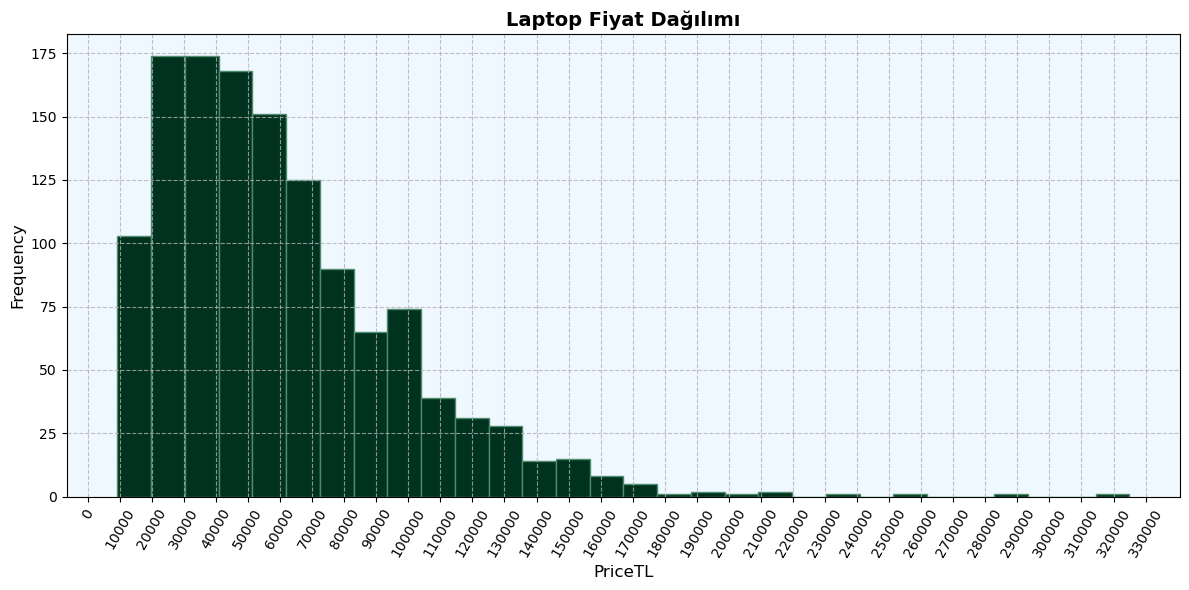

In [44]:
plt.figure(figsize=(12, 6))
plt.hist(df['PriceTL'], bins=30, color='#013220', edgecolor='#4C8C6A') 
plt.title('Laptop Fiyat Dağılımı', fontsize=14, fontweight='bold') 
plt.xlabel('PriceTL', fontsize=12)   
plt.ylabel('Frequency', fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')  
plt.xticks(ticks=range(0, int(df['PriceTL'].max())+10000, 10000), rotation=60)
plt.tight_layout()
plt.show()

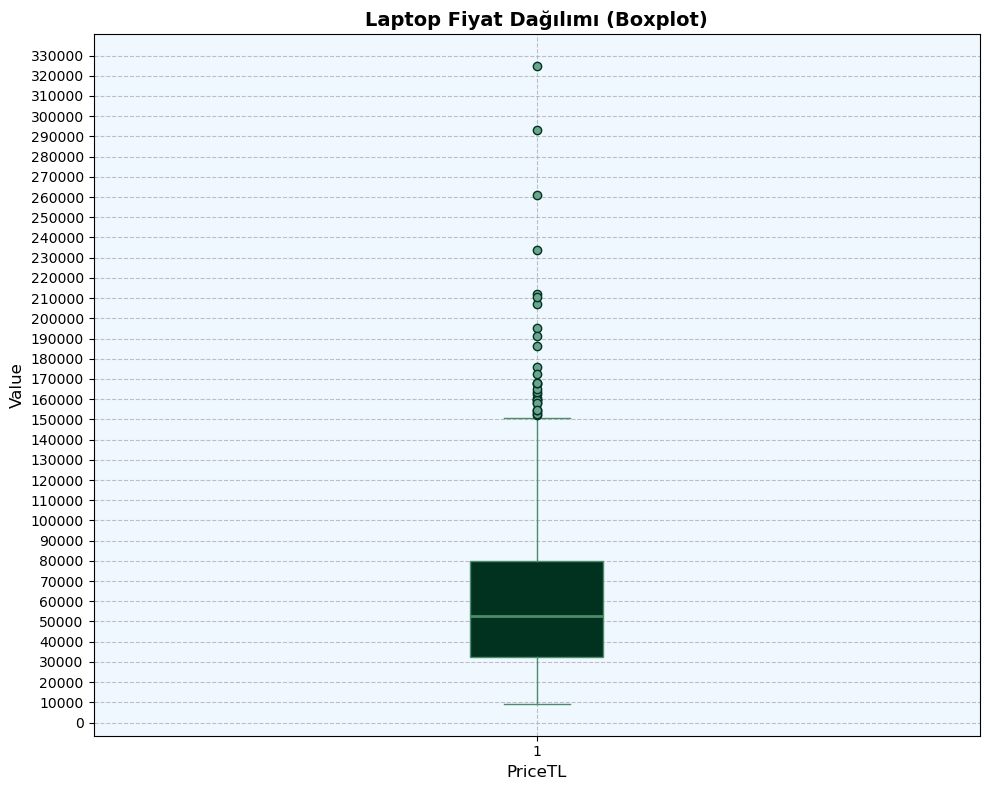

In [45]:
plt.figure(figsize=(10, 8))
plt.boxplot(df['PriceTL'], patch_artist=True,
            boxprops=dict(facecolor='#013220', color='#4C8C6A'),
            medianprops=dict(color='#4C8C6A', linewidth=2),
            whiskerprops=dict(color='#4C8C6A'),
            capprops=dict(color='#4C8C6A'),
            flierprops=dict(markerfacecolor='#6BA48F', marker='o', markersize=6, linestyle='none', markeredgecolor='#013220'))
plt.title('Laptop Fiyat Dağılımı (Boxplot)', fontsize=14, fontweight='bold')
plt.xlabel('PriceTL', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(True, linestyle='--', alpha=0.8)
plt.yticks(ticks=range(0, int(df['PriceTL'].max())+10000, 10000))
plt.tight_layout()
plt.show()

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inches,1274.0,15.022449,1.429940,10.10,14.000,15.60,15.60,18.40
RamGB,1274.0,8.444270,5.098291,2.00,4.000,8.00,8.00,64.00
Kg,1274.0,2.040400,0.669444,0.69,1.500,2.04,2.31,4.70
PriceTL,1274.0,60503.185071,37333.223017,9270.72,32495.605,52693.92,79773.48,324954.72


<div class="alert alert-block alert-success">

Üst uçta (whisker) çok daha yüksek fiyatlı birkaç model var, bu da piyasada pahalı modellerin bulunduğunu gösteriyor.
Veri setinde uç değerler (çok pahalı laptoplar) mevcut gözüküyor.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Company-wise Analysis:

- Bir çubuk grafik kullanarak her bir şirket için dizüstü bilgisayar sayısını çizip, yine her bir şirket için dizüstü bilgisayarların ortalama fiyatını görselleştireceğiz.

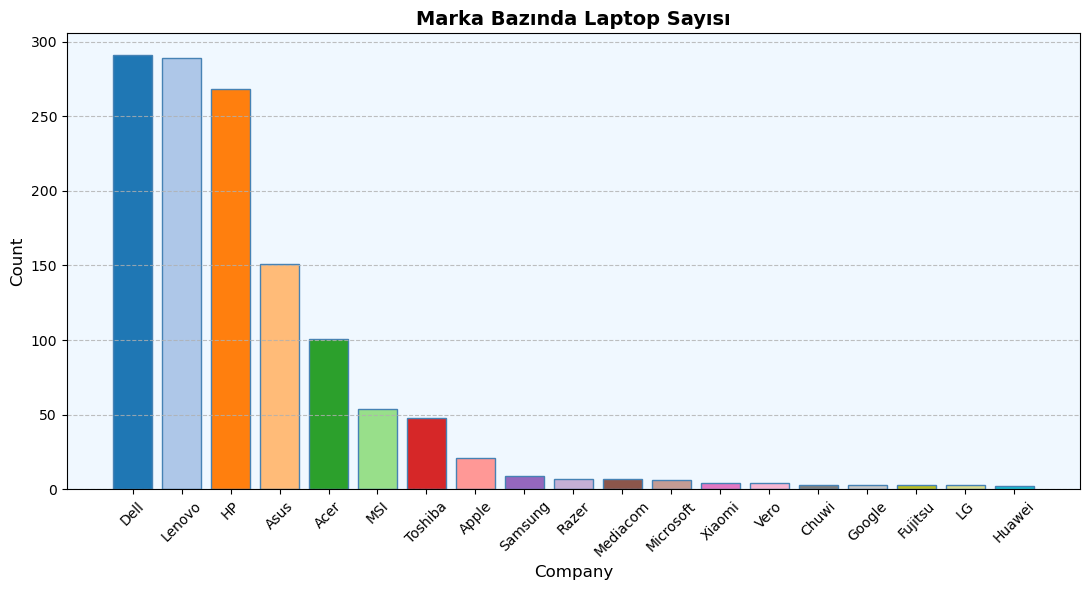

In [47]:
company_counts = df['Company'].value_counts()
colors = plt.cm.tab20.colors 
plt.figure(figsize=(11,6))
plt.bar(company_counts.index, company_counts.values, 
        color=colors[:20], edgecolor='#4682B4') 
plt.title('Marka Bazında Laptop Sayısı', fontsize=14, fontweight='bold')
plt.xlabel('Company', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

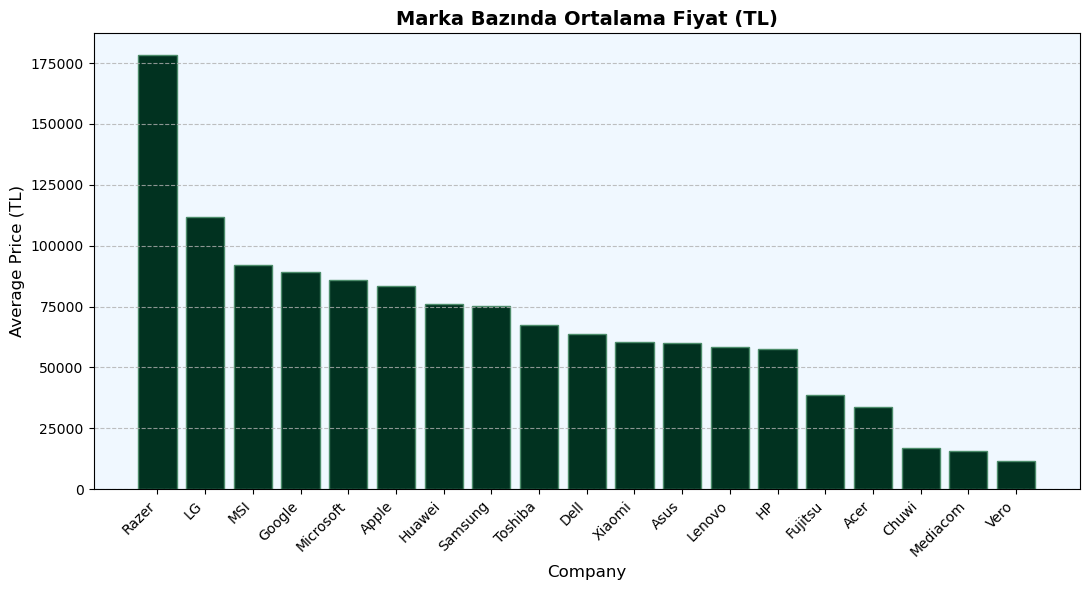

In [48]:
avg_price_by_company = df.groupby('Company')['PriceTL'].mean().sort_values(ascending=False)
plt.figure(figsize=(11,6))
colors = plt.cm.tab20.colors  
plt.bar(avg_price_by_company.index, avg_price_by_company.values,color='#013220', edgecolor='#4C8C6A')

plt.title('Marka Bazında Ortalama Fiyat (TL)', fontsize=14, fontweight='bold')
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Price (TL)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> INCH vs PRICE   and   RAM vs PRICE Analysis:

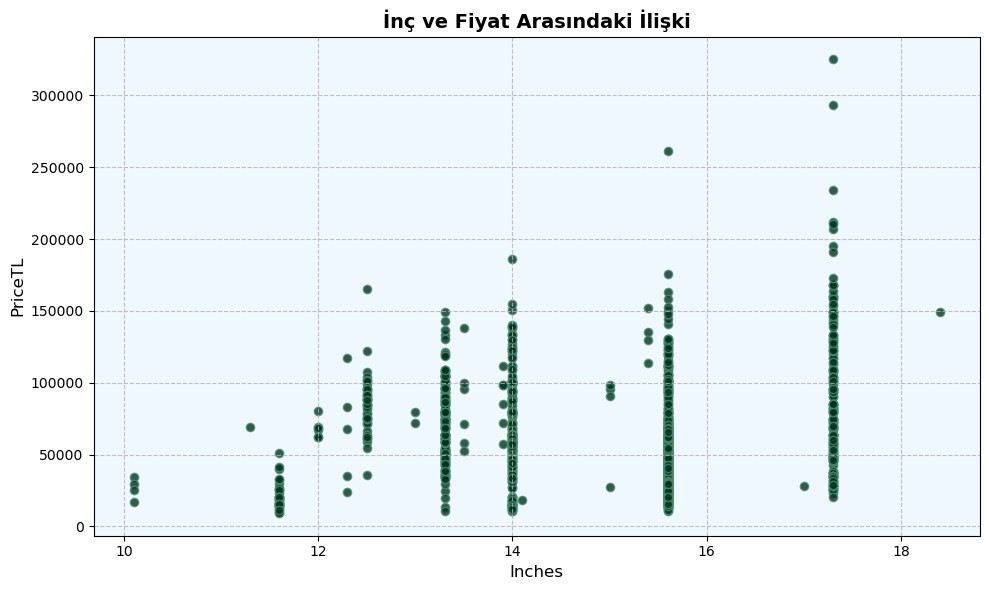

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Inches'], df['PriceTL'], color='#013220', edgecolors='#4C8C6A', alpha=0.8)
plt.title('İnç ve Fiyat Arasındaki İlişki', fontsize=14, fontweight='bold') 
plt.xlabel('Inches', fontsize=12)  
plt.ylabel('PriceTL', fontsize=12)   
plt.grid(True, linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')  
plt.tight_layout()
plt.show()

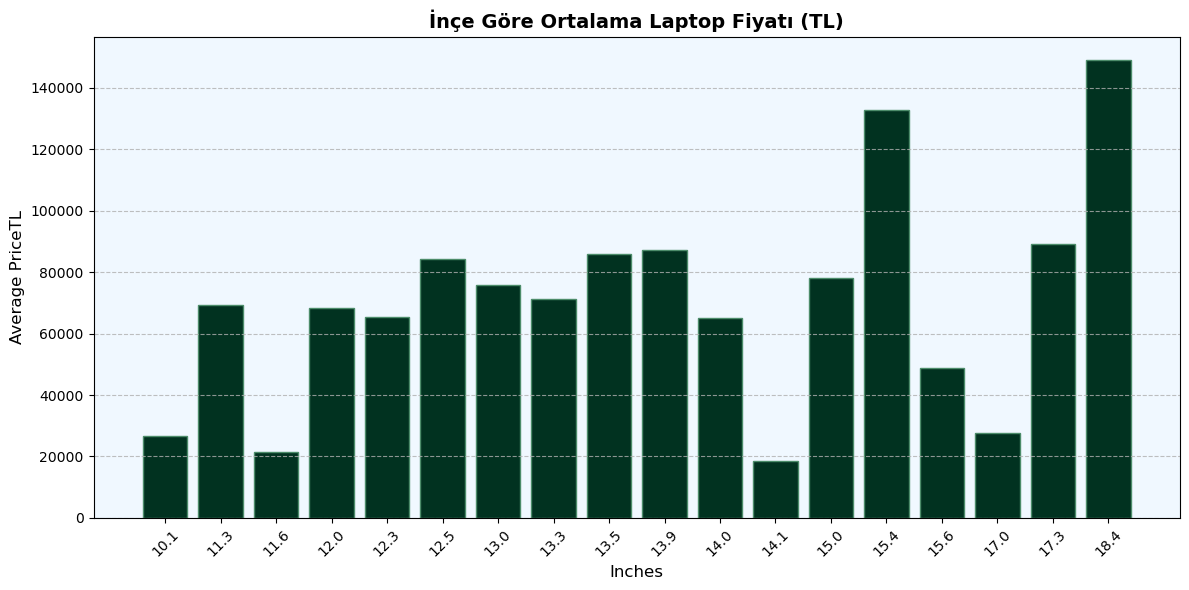

In [50]:
inch_avg_price = df.groupby('Inches')['PriceTL'].mean().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(inch_avg_price.index.astype(str), inch_avg_price.values, color='#013220', edgecolor='#4C8C6A')
plt.title('İnçe Göre Ortalama Laptop Fiyatı (TL)', fontsize=14, fontweight='bold')
plt.xlabel('Inches', fontsize=12)
plt.ylabel('Average PriceTL', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

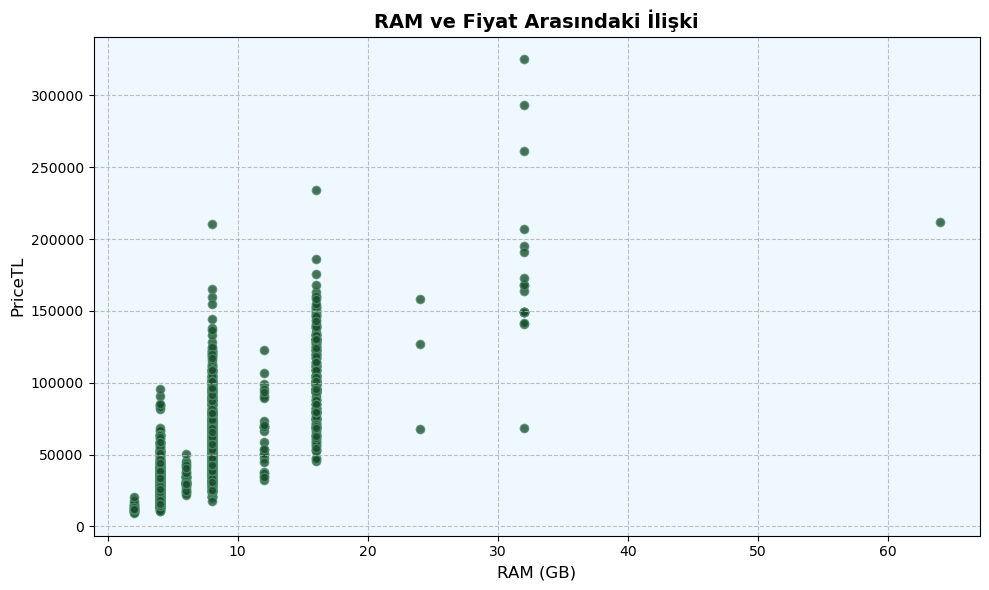

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(df['RamGB'], df['PriceTL'], color='#1C4C2E', edgecolors='#4C8C6A', alpha=0.8)
plt.title('RAM ve Fiyat Arasındaki İlişki', fontsize=14, fontweight='bold')
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('PriceTL', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()


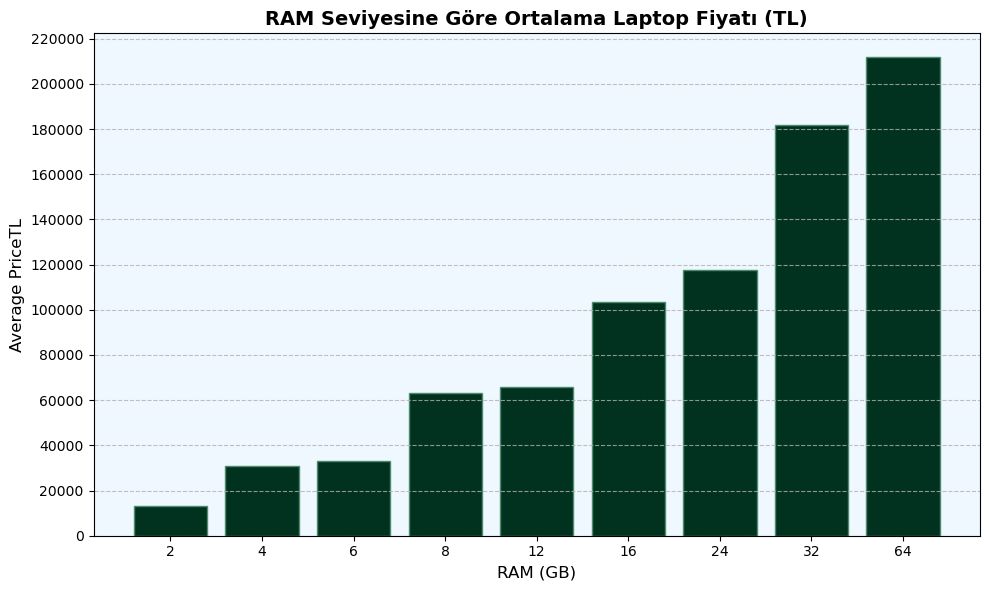

In [52]:
ram_avg_price = df.groupby('RamGB')['PriceTL'].mean().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(ram_avg_price.index.astype(str), ram_avg_price.values, color='#013220', edgecolor='#4C8C6A')
plt.title('RAM Seviyesine Göre Ortalama Laptop Fiyatı (TL)', fontsize=14, fontweight='bold')
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Average PriceTL', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.yticks(ticks=range(0, int(ram_avg_price.max())+20000, 20000))
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Operating System Market Share:

- Dizüstü bilgisayarların Opsys'e göre dağılımını göstermek için bir pasta grafikoluşturuyoruz. 

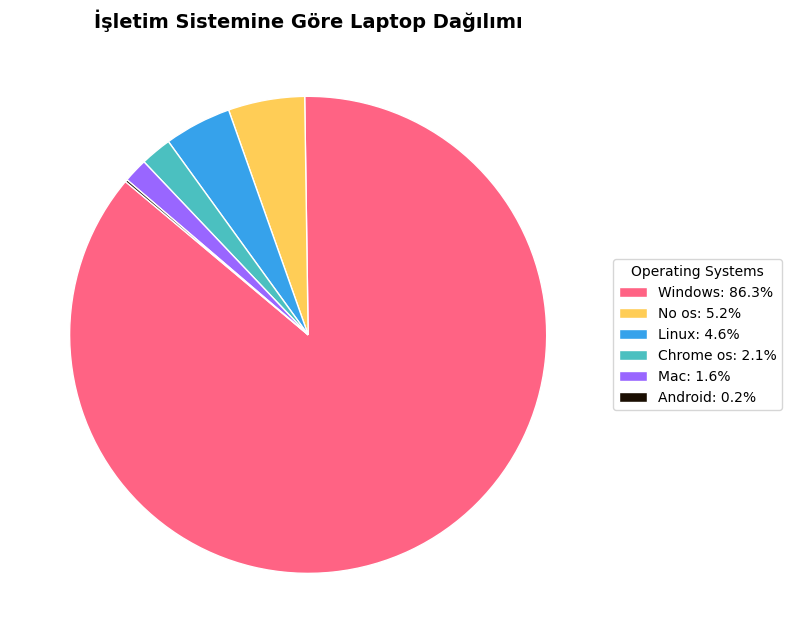

In [53]:
opsys_counts = df['Opsys'].value_counts()
colors = ['#FF6384','#FFCD56','#36A2EB','#4BC0C0','#9966FF',"#1A0E02",]  
plt.figure(figsize=(8,8))
wedges, texts = plt.pie(
    opsys_counts.values,
    labels=None,  
    startangle=140,
    colors=colors[:len(opsys_counts)],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1})
labels_with_pct = [
    f"{name}: {pct:.1f}%" for name, pct in zip(
        opsys_counts.index,
        100 * opsys_counts.values / opsys_counts.values.sum())]

plt.legend(wedges, labels_with_pct, title="Operating Systems", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('İşletim Sistemine Göre Laptop Dağılımı', fontsize=14, fontweight='bold')
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Weight Distribution:

- Dizüstü bilgisayarların ağırlık dağılımını analiz etmek için bir histogram çiziyoruz.

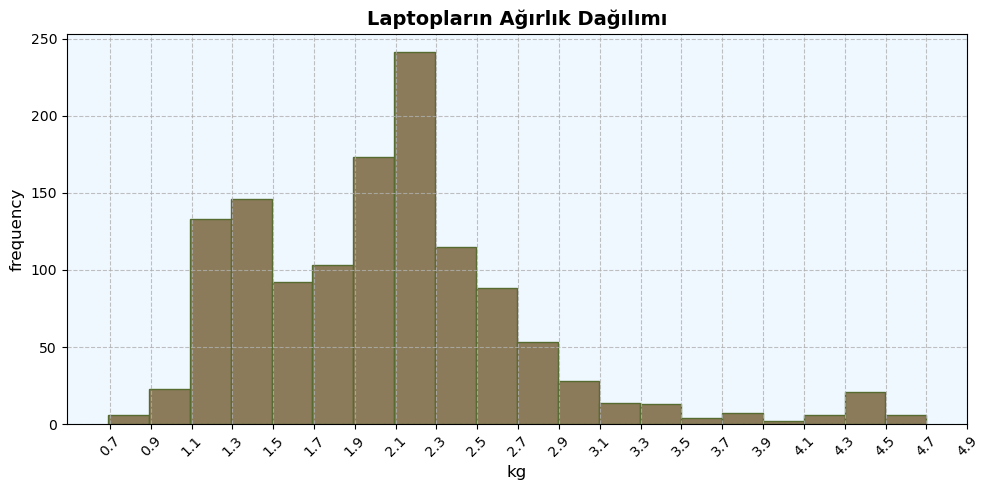

In [54]:
plt.figure(figsize=(10, 5))
hist_colors = ['#556B2F','#8B7B5A','#A0522D'] 
plt.hist(df['Kg'], bins=int((df['Kg'].max() - df['Kg'].min()) / 0.2), color=hist_colors[1], edgecolor=hist_colors[0])
plt.title('Laptopların Ağırlık Dağılımı', fontsize=14, fontweight='bold')
plt.xlabel('kg', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
# 0.2 kg aralıklarla x ekseni
ticks = [round(x, 1) for x in list(np.arange(df['Kg'].min(), df['Kg'].max()+0.2, 0.2))]
plt.xticks(ticks=ticks, rotation=45)  
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Price Correlation Analysis:

- Sayısal sütunlar (İnç, Ağırlık, Ram, vb.) ve Fiyat arasındaki korelasyonu hesaplayıp görselleştireceğiz.

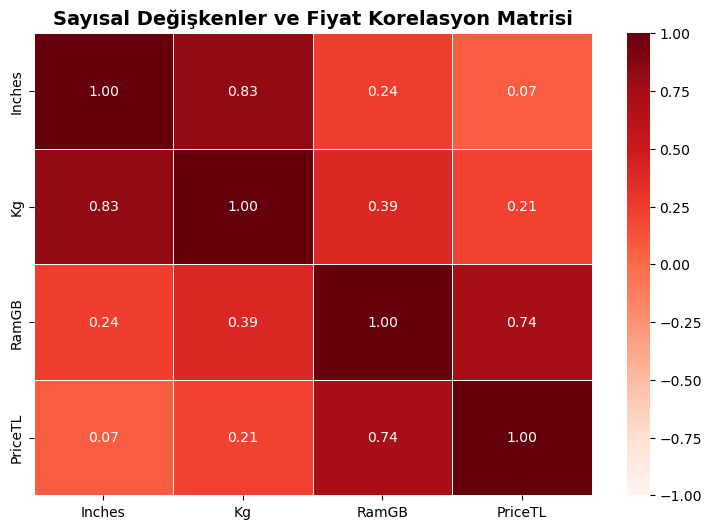

In [55]:
num_cols = ['Inches', 'Kg', 'RamGB', 'PriceTL']
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Reds", fmt=".2f",
    linewidths=0.5, cbar=True, vmin=-1, vmax=1)
plt.title('Sayısal Değişkenler ve Fiyat Korelasyon Matrisi', fontsize=14, fontweight='bold')
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> ScreenResolution Impact on Price:

- Farklı çözünürlük türlerinin (ör. Full HD, 4K) fiyatı nasıl etkilediğini analiz ediyoruz.

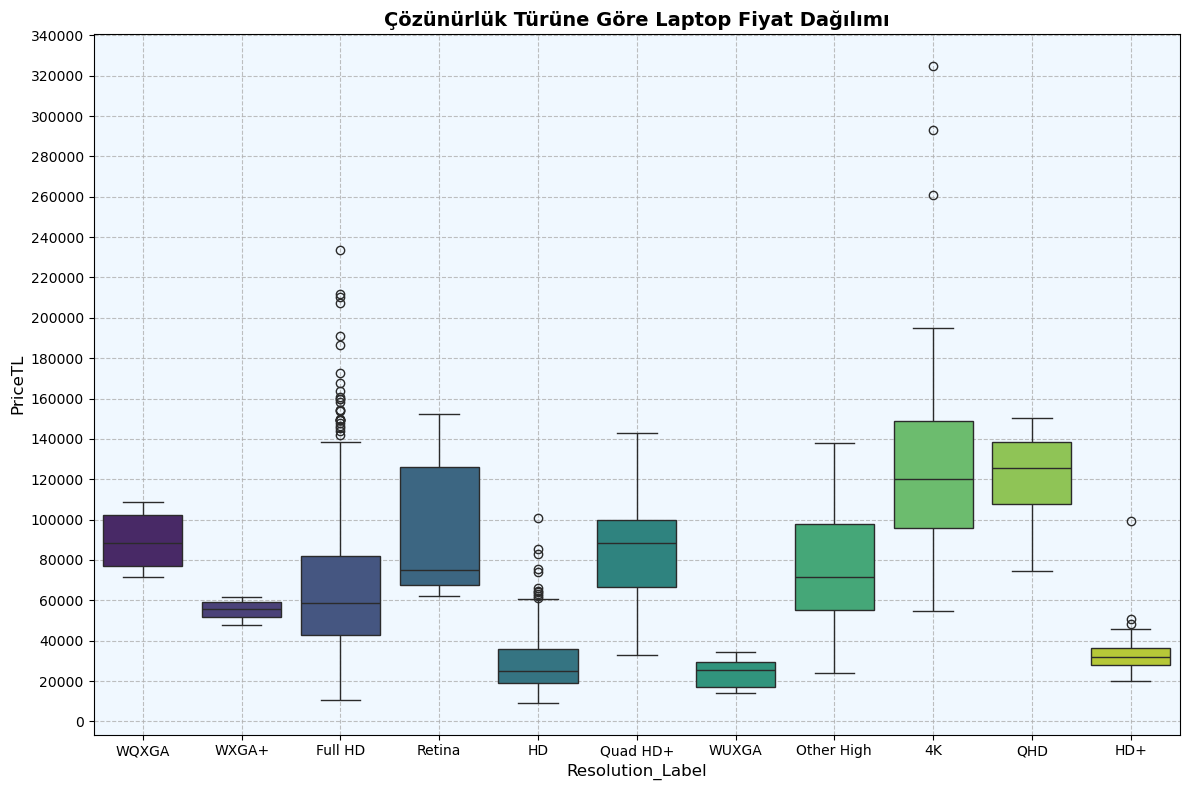

In [56]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Resolution_Label', y='PriceTL', data=df, palette='viridis')
plt.title('Çözünürlük Türüne Göre Laptop Fiyat Dağılımı', fontsize=14, fontweight='bold')
plt.xlabel('Resolution_Label', fontsize=12)
plt.ylabel('PriceTL', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.yticks(ticks=range(0, int(df['PriceTL'].max())+20000, 20000))
plt.tight_layout()
plt.show()

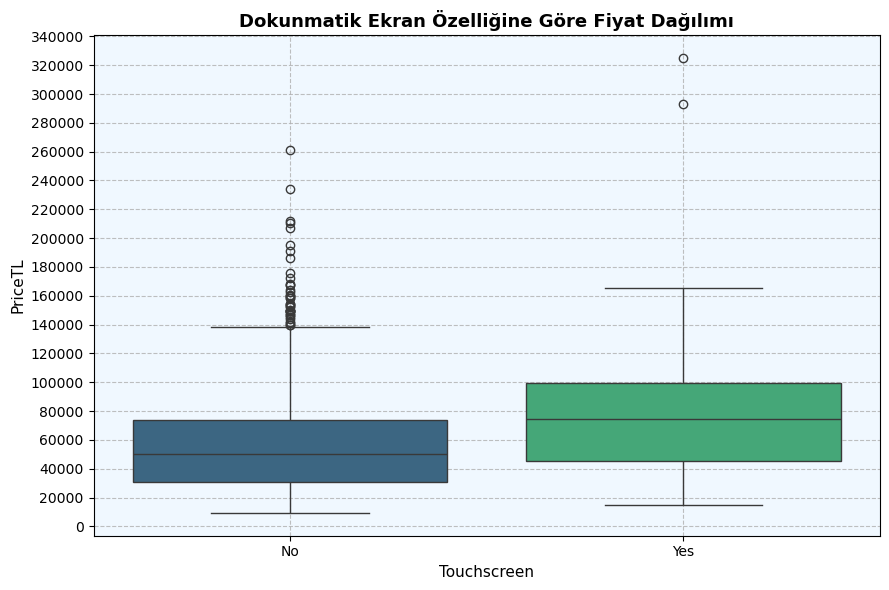

In [57]:
plt.figure(figsize=(9, 6))
sns.boxplot(x='Touchscreen', y='PriceTL', data=df, palette='viridis')
plt.title('Dokunmatik Ekran Özelliğine Göre Fiyat Dağılımı', fontsize=13, fontweight='bold')
plt.xlabel('Touchscreen', fontsize=11)
plt.ylabel('PriceTL', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(True, linestyle='--', alpha=0.8)
plt.yticks(ticks=range(0, int(df['PriceTL'].max())+20000, 20000))
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Top CPU/GPU Manufacturers:

- En yaygın CPU ve GPU üreticilerini görselleştireceğiz.

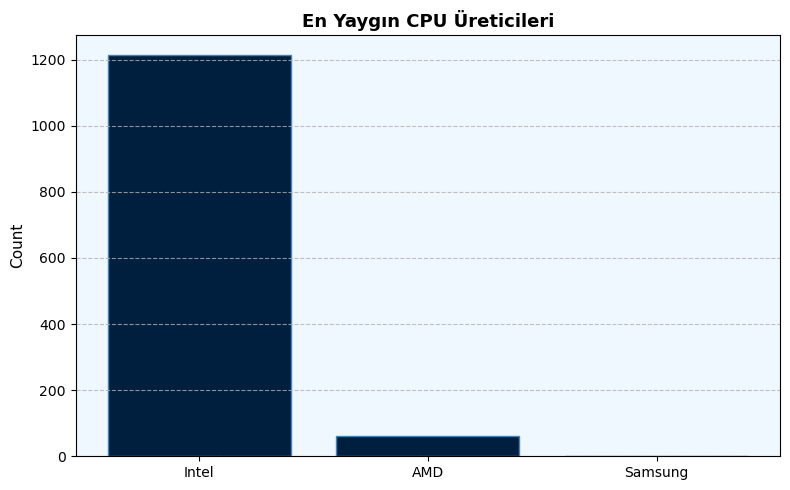

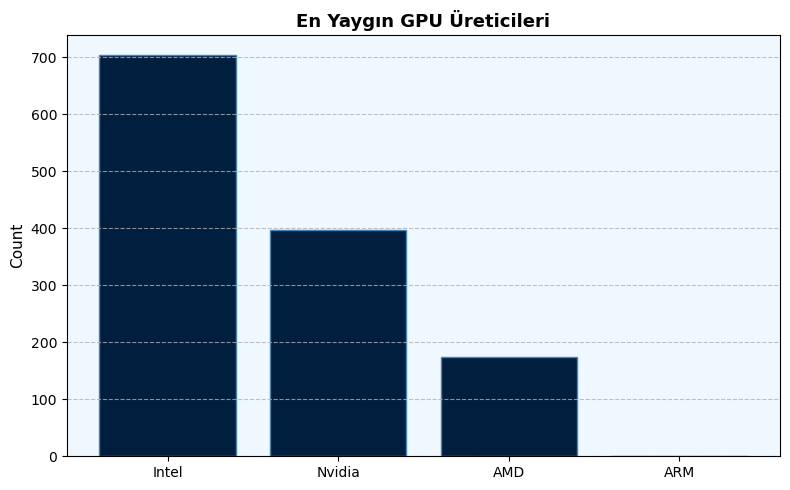

In [58]:
# En yaygın CPU üreticileri
cpu_counts = df['Cpu_Brand'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(cpu_counts.index, cpu_counts.values, color='#001F3F', edgecolor='#4682B4')
plt.title('En Yaygın CPU Üreticileri', fontsize=13, fontweight='bold')
plt.ylabel('Count', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

# En yaygın GPU üreticileri
gpu_counts = df['Gpu_Brand'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(gpu_counts.index, gpu_counts.values, color='#001F3F', edgecolor='#4682B4')
plt.title('En Yaygın GPU Üreticileri', fontsize=13, fontweight='bold')
plt.ylabel('Count', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> RAM Analysis:

- En yaygın RAM konfigürasyonlarını ve bunların ortalama fiyatlarını belirliyoruz.

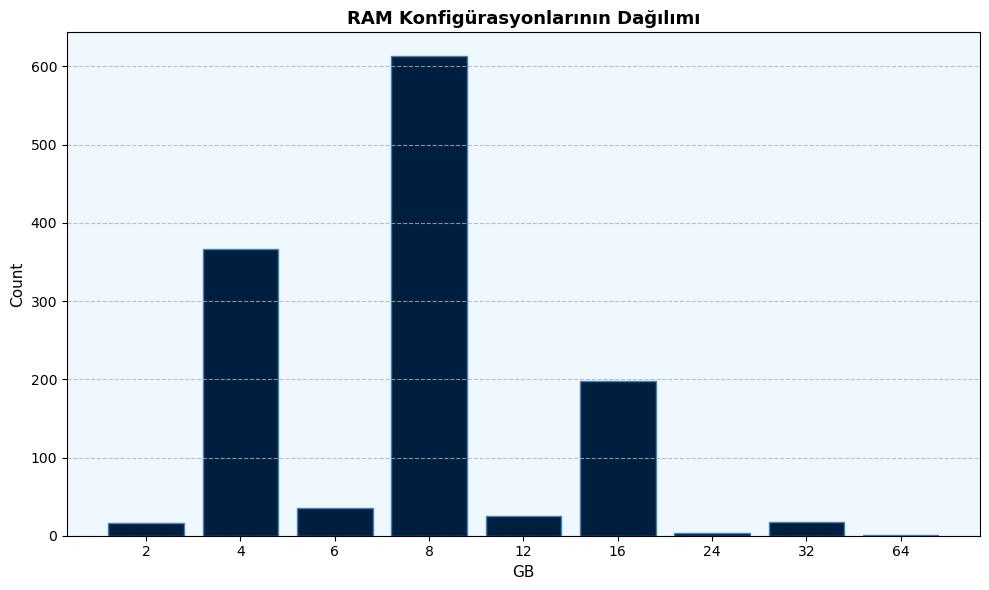

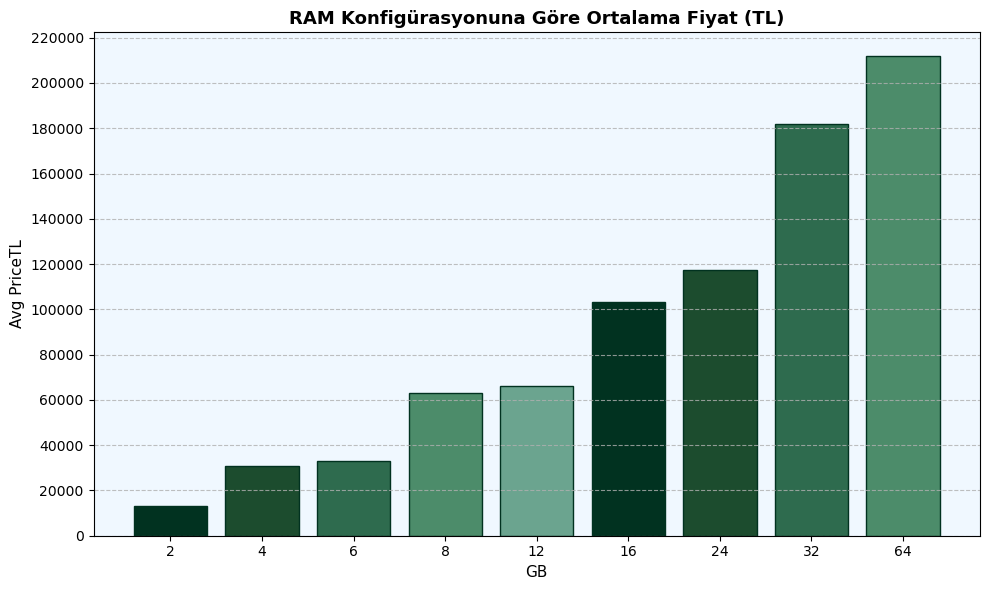

In [59]:
ram_counts = df['RamGB'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(ram_counts.index.astype(str), ram_counts.values, color='#001F3F', edgecolor='#4682B4')
plt.title('RAM Konfigürasyonlarının Dağılımı', fontsize=13, fontweight='bold')
plt.xlabel('GB', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

ram_avg_price = df.groupby('RamGB')['PriceTL'].mean().sort_index()

green_palette = ['#013220', '#1C4C2E', '#2E6B4E', '#4C8C6A', '#6BA48F']

bar_colors = (green_palette * ((len(ram_avg_price) // len(green_palette)) + 1))[:len(ram_avg_price)]

plt.figure(figsize=(10, 6))
plt.bar(ram_avg_price.index.astype(str), ram_avg_price.values, color=bar_colors, edgecolor='#013220')
plt.title('RAM Konfigürasyonuna Göre Ortalama Fiyat (TL)', fontsize=13, fontweight='bold')
plt.xlabel('GB', fontsize=11)
plt.ylabel('Avg PriceTL', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.yticks(ticks=range(0, int(ram_avg_price.max())+20000, 20000))
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Memory Type and Price Relationship:

- Bellek türünün (örn. HDD, SSD, Hibrit) fiyat üzerindeki etkisini analiz ediyoruz.

In [60]:
# Bellek türünü ayıklayan fonksiyon
def extract_memory_type(text):
    text = text.lower()
    if 'ssd' in text and 'hdd' in text:
        return 'Hybrid'
    elif 'flash storage' in text:
        return 'Flash Storage'
    elif 'hybrid' in text:
        return 'Hybrid'
    elif 'ssd' in text:
        return 'SSD'
    elif 'hdd' in text:
        return 'HDD'
    else:
        return 'Other'
df['Memory_Type'] = df['Memory'].apply(extract_memory_type)

In [61]:
df['Memory_Type'].value_counts()

Memory_Type
SSD              635
HDD              358
Hybrid           210
Flash Storage     71
Name: count, dtype: int64

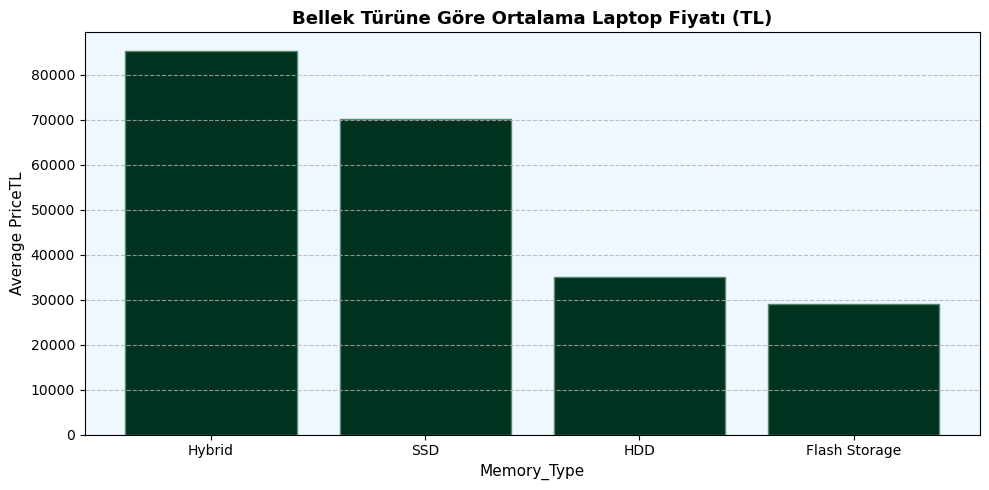

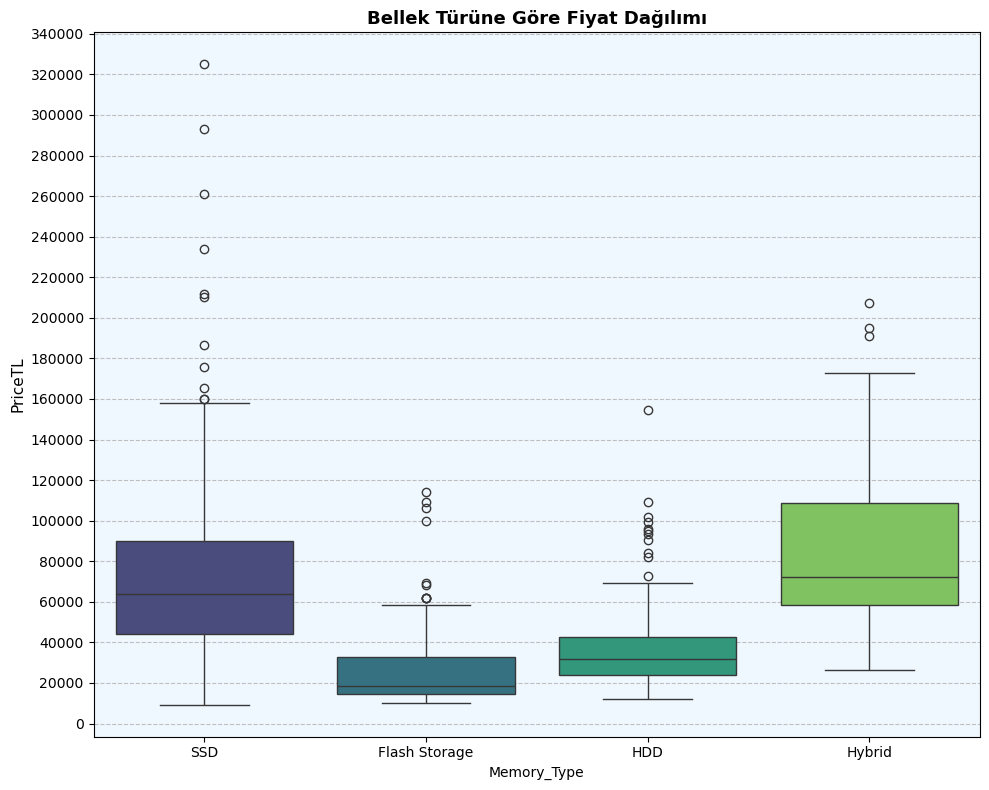

In [62]:
mem_price = df.groupby('Memory_Type')['PriceTL'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(mem_price.index, mem_price.values, color='#013220', edgecolor='#4C8C6A')
plt.title('Bellek Türüne Göre Ortalama Laptop Fiyatı (TL)', fontsize=13, fontweight='bold')
plt.xlabel('Memory_Type', fontsize=11)
plt.ylabel('Average PriceTL', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='Memory_Type', y='PriceTL', data=df, palette='viridis')
plt.title('Bellek Türüne Göre Fiyat Dağılımı', fontsize=13, fontweight='bold')
plt.ylabel('PriceTL', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.yticks(ticks=range(0, int(df['PriceTL'].max())+20000, 20000))
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> High-end Laptop Analysis:

- “Üst düzey” dizüstü bilgisayarı tanımlayıp (örneğin, Fiyat veya teknik özelliklere göre) özelliklerini analiz ediyoruz.

Üst Düzey Laptopların Temel İstatistikleri:
         count           mean           std       min        25%         50%  \
Inches   256.0      15.126563      1.629507     12.30     13.975      15.600   
RamGB    256.0      13.984375      6.905507      4.00      8.000      16.000   
Kg       256.0       2.226922      1.082476      0.91      1.320       1.950   
PriceTL  256.0  119161.494336  31914.175242  88924.32  98461.440  109168.055   

               75%        max  
Inches       17.30      18.40  
RamGB        16.00      64.00  
Kg            2.90       4.70  
PriceTL  130482.72  324954.72  


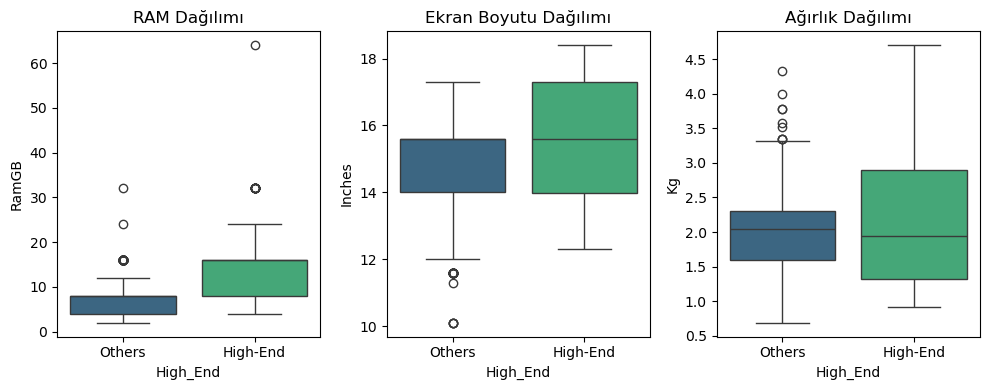

Üst Düzey Laptoplarda En Yaygın Şirketler:
Company
Dell         59
Lenovo       59
HP           45
Asus         30
MSI          26
Toshiba      10
Apple         7
Razer         6
Samsung       4
Microsoft     3
LG            3
Acer          3
Google        1
Name: count, dtype: int64

Üst Düzey Laptoplarda Bellek Türleri:
Memory_Type
SSD              167
Hybrid            77
HDD                8
Flash Storage      4
Name: count, dtype: int64


In [63]:
# Üst düzey laptoplar için fiyat eşiği (en üst %20'lik dilim)
price_threshold = df['PriceTL'].quantile(0.80) 

df['High_End'] = np.where(df['PriceTL'] >= price_threshold, 'High-End', 'Others')

# Üst düzey laptopların temel istatistikleri
high_end_stats = df[df['High_End'] == 'High-End'].describe().T
print("Üst Düzey Laptopların Temel İstatistikleri:")
print(high_end_stats)

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='High_End', y='RamGB', data=df, palette='viridis')
plt.title('RAM Dağılımı')

plt.subplot(1, 3, 2)
sns.boxplot(x='High_End', y='Inches', data=df, palette='viridis')
plt.title('Ekran Boyutu Dağılımı')

plt.subplot(1, 3, 3)
sns.boxplot(x='High_End', y='Kg', data=df, palette='viridis')
plt.title('Ağırlık Dağılımı')

plt.tight_layout()
plt.show()

# Üst düzey laptoplarda en yaygın şirketler ve bellek türleri
print("Üst Düzey Laptoplarda En Yaygın Şirketler:")
print(df[df['High_End'] == 'High-End']['Company'].value_counts())

print("\nÜst Düzey Laptoplarda Bellek Türleri:")
print(df[df['High_End'] == 'High-End']['Memory_Type'].value_counts())

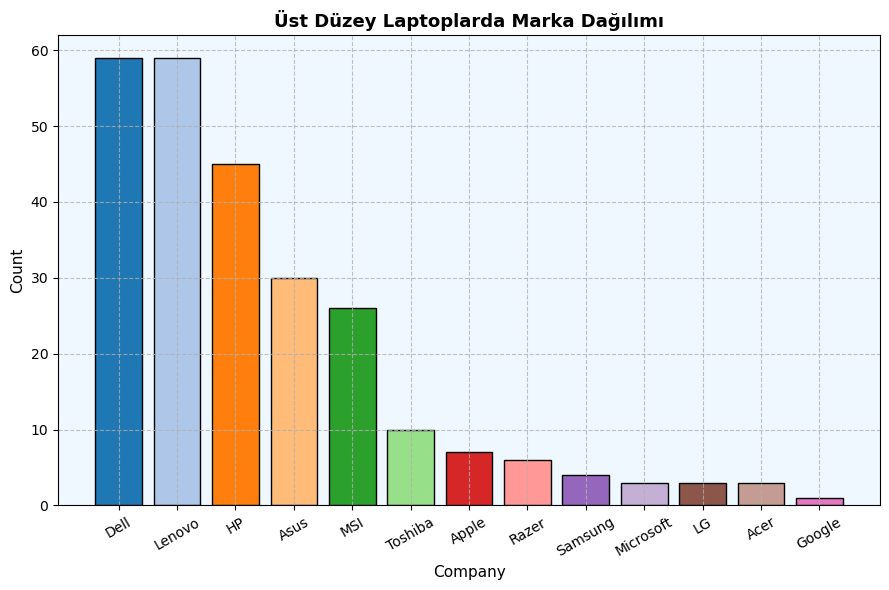

In [64]:
high_end_comp_counts = df[df['High_End'] == 'High-End']['Company'].value_counts()
colors = plt.cm.tab20.colors 
plt.figure(figsize=(9, 6))
plt.bar(high_end_comp_counts.index, high_end_comp_counts.values, 
        color=colors[:len(high_end_comp_counts)], edgecolor='black') 
plt.title('Üst Düzey Laptoplarda Marka Dağılımı', fontsize=13, fontweight='bold')
plt.xlabel('Company', fontsize=11)  # Türkçeye çevirdim
plt.ylabel('Count', fontsize=11)   # Türkçeye çevirdim
plt.xticks(rotation=30)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()


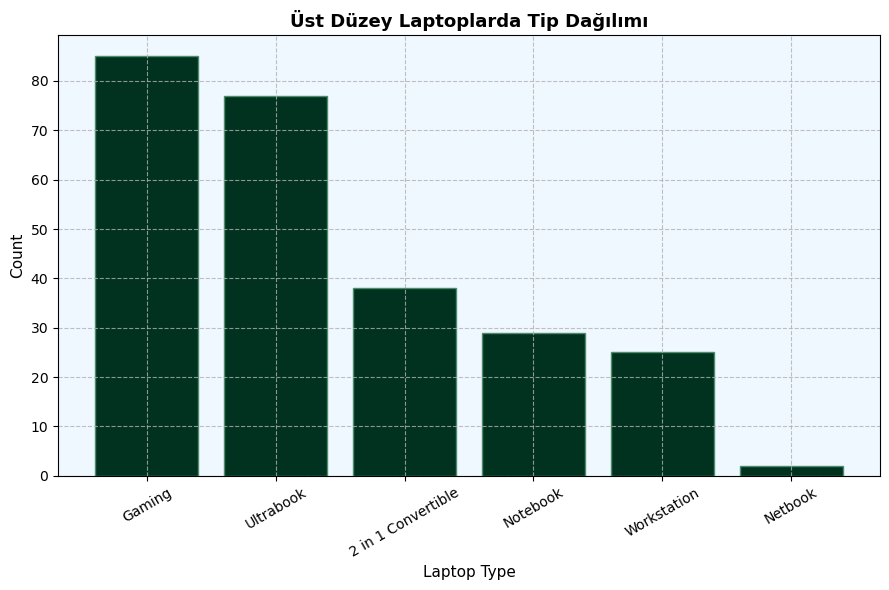

In [65]:
high_end_type_counts = df[df['High_End'] == 'High-End']['Type'].value_counts()

plt.figure(figsize=(9, 6))
plt.bar(high_end_type_counts.index, high_end_type_counts.values, color='#013220', edgecolor='#4C8C6A')
plt.title('Üst Düzey Laptoplarda Tip Dağılımı', fontsize=13, fontweight='bold')
plt.xlabel('Laptop Type', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.xticks(rotation=30)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

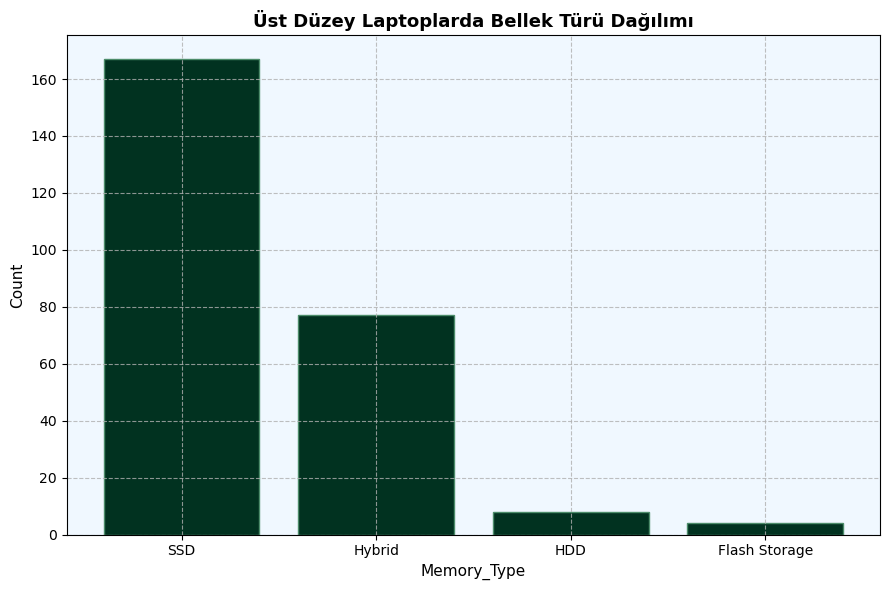

In [66]:
high_end_type_counts = df[df['High_End'] == 'High-End']['Memory_Type'].value_counts()

plt.figure(figsize=(9, 6))
plt.bar(high_end_type_counts.index, high_end_type_counts.values, color='#013220', edgecolor='#4C8C6A')
plt.title('Üst Düzey Laptoplarda Bellek Türü Dağılımı', fontsize=13, fontweight='bold')
plt.xlabel('Memory_Type', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

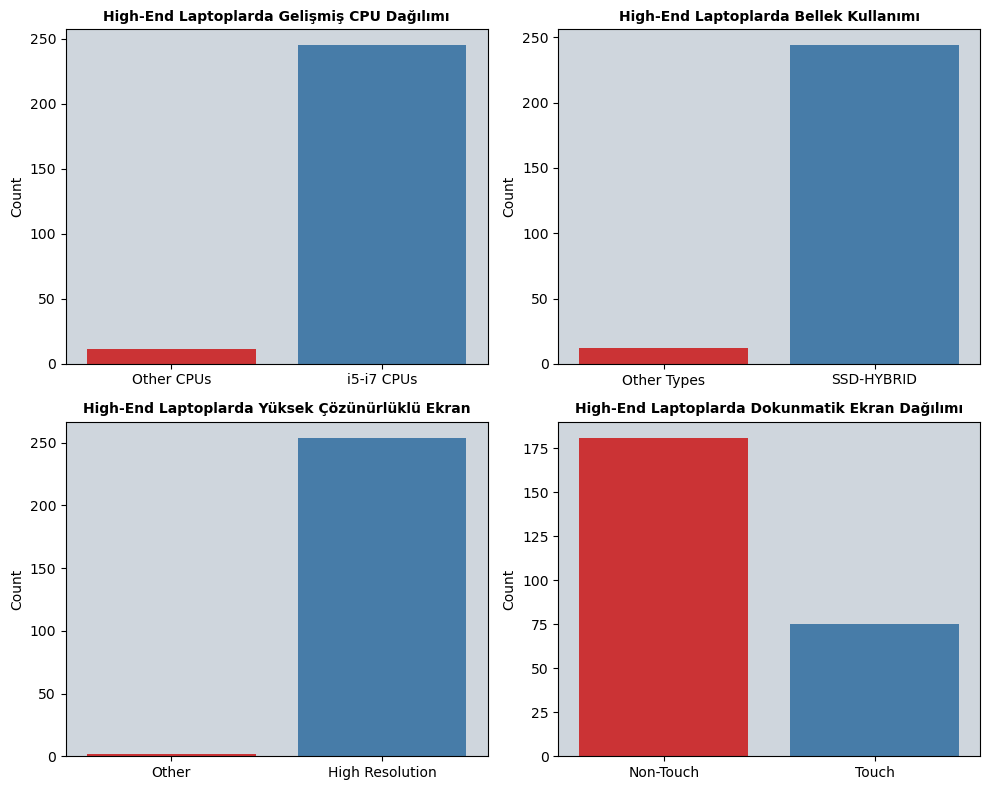

In [67]:
high_end = df[df['High_End'] == 'High-End']

# Özellik sütunları hazırlanıyor (önceki hücrelerden kopyalanarak)
high_end['Advanced_CPU'] = high_end['Cpu_Type'].fillna('').str.lower().str.contains('i5|i7')
high_end['SSD_Hybrid'] = high_end['Memory_Type'].fillna('').str.upper().str.contains('SSD|HYBRID')
high_end['High_Res'] = high_end['Resolution_Label'].isin([
    "Full HD", "4K", "Quad HD+", "QHD", "Retina", "WQXGA", "WUXGA", "Other High"
])

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 1. Gelişmiş CPU
cpu_counts = high_end['Advanced_CPU'].value_counts().sort_index()
cpu_labels = ['Other CPUs', 'i5-i7 CPUs']
sns.barplot(x=cpu_labels, y=cpu_counts.values, palette="Set1", ax=axes[0, 0])
axes[0, 0].set_title('High-End Laptoplarda Gelişmiş CPU Dağılımı', fontsize=10, fontweight='bold')
axes[0, 0].set_facecolor('#CFD6DD')
axes[0, 0].set_ylabel('Count')

# 2. Bellek Kullanımı
storage_counts = high_end['SSD_Hybrid'].value_counts().sort_index()
storage_labels = ['Other Types', 'SSD-HYBRID']
sns.barplot(x=storage_labels, y=storage_counts.values, palette="Set1", ax=axes[0, 1])
axes[0, 1].set_title('High-End Laptoplarda Bellek Kullanımı', fontsize=10, fontweight='bold')
axes[0, 1].set_facecolor('#CFD6DD')
axes[0, 1].set_ylabel('Count')

# 3. Yüksek Çözünürlüklü Ekran
res_counts = high_end['High_Res'].value_counts().sort_index()
res_labels = ['Other', 'High Resolution']
sns.barplot(x=res_labels, y=res_counts.values, palette="Set1", ax=axes[1, 0])
axes[1, 0].set_title('High-End Laptoplarda Yüksek Çözünürlüklü Ekran', fontsize=10, fontweight='bold')
axes[1, 0].set_facecolor('#CFD6DD')
axes[1, 0].set_ylabel('Count')

# 4. Dokunmatik Ekran
touch_counts = high_end['Touchscreen'].value_counts().reindex(['No', 'Yes']).fillna(0)
touch_labels = ['Non-Touch', 'Touch']
sns.barplot(x=touch_labels, y=touch_counts.values, palette="Set1", ax=axes[1, 1])
axes[1, 1].set_title('High-End Laptoplarda Dokunmatik Ekran Dağılımı', fontsize=10, fontweight='bold')
axes[1, 1].set_facecolor('#CFD6DD')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> TypeName Analysis:

- Dizüstü bilgisayar tip dağılımını ve bunun fiyatla ilişkisini keşfediyoruz.(örneğin, Gaming vs Ultrabook)

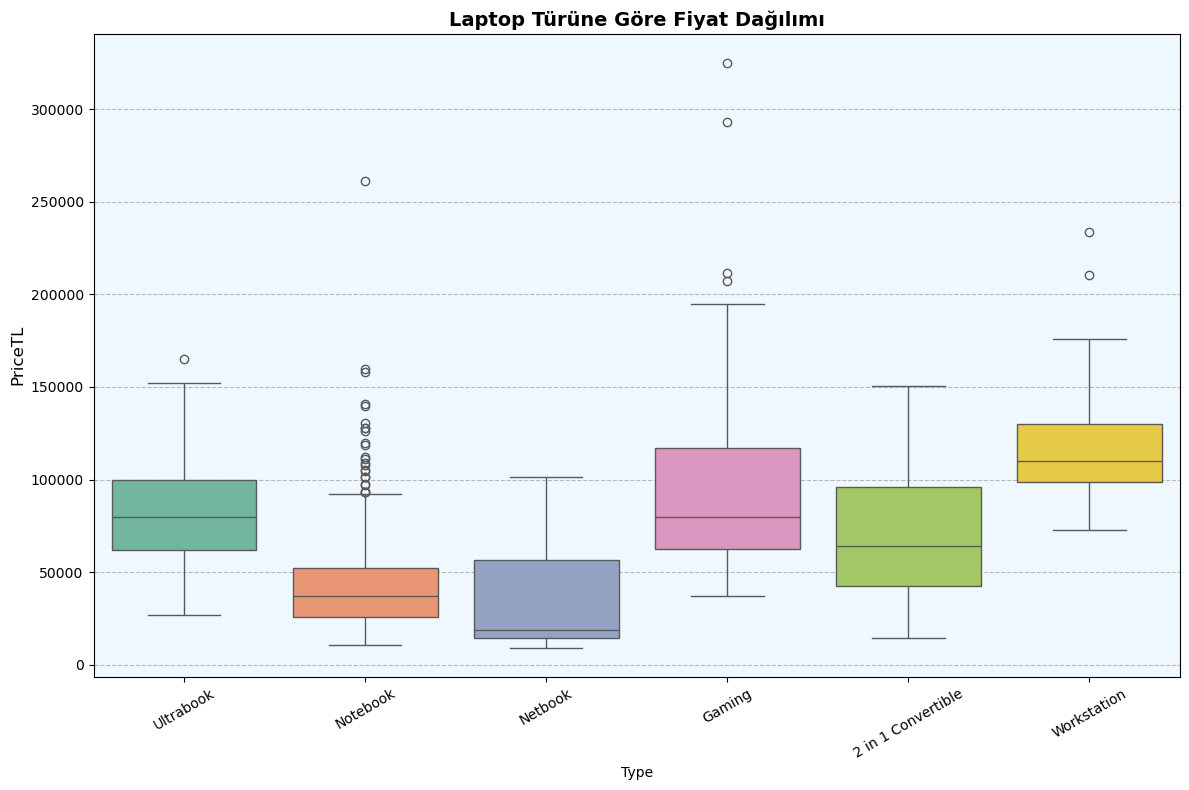

In [68]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Type', y='PriceTL', data=df, palette='Set2')
plt.title('Laptop Türüne Göre Fiyat Dağılımı', fontsize=14, fontweight='bold')
plt.ylabel('PriceTL', fontsize=12)
plt.xticks(rotation=30)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()

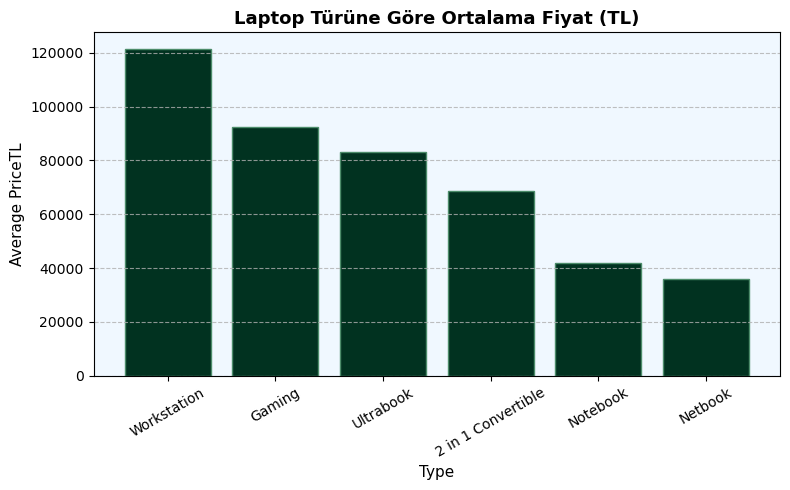

In [69]:
laptop_avg_price = df.groupby('Type')['PriceTL'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.bar(laptop_avg_price.index, laptop_avg_price.values, color='#013220', edgecolor='#4C8C6A')
plt.title('Laptop Türüne Göre Ortalama Fiyat (TL)', fontsize=13, fontweight='bold')
plt.xlabel('Type', fontsize=11)
plt.ylabel('Average PriceTL', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

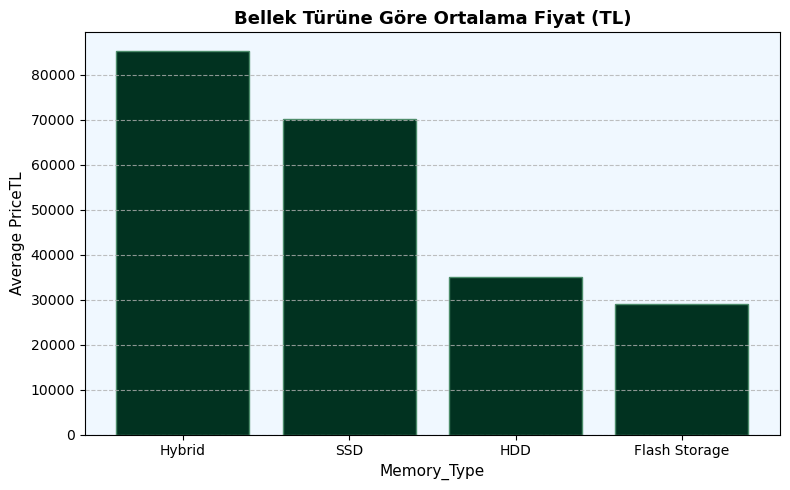

In [70]:
memory_avg_price = df.groupby('Memory_Type')['PriceTL'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.bar(memory_avg_price.index, memory_avg_price.values, color='#013220', edgecolor='#4C8C6A')
plt.title('Bellek Türüne Göre Ortalama Fiyat (TL)', fontsize=13, fontweight='bold')
plt.xlabel('Memory_Type', fontsize=11)
plt.ylabel('Average PriceTL', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

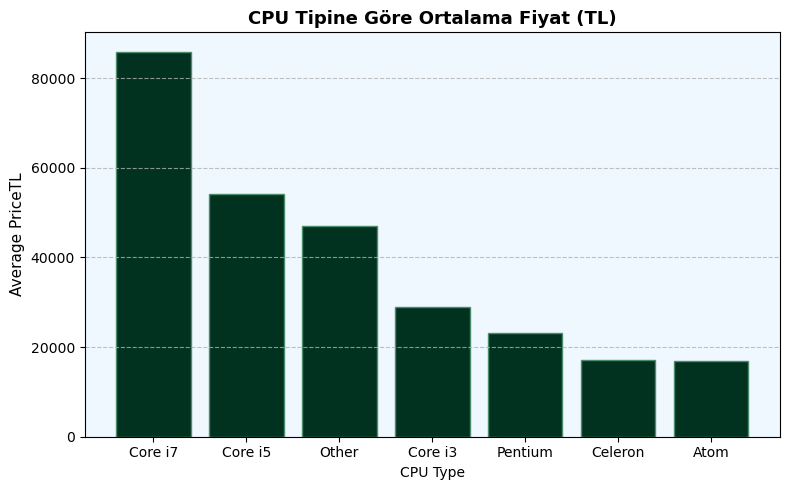

In [71]:
# CPU tipine göre ortalama fiyat
cpu_avg_price = df.groupby('Cpu_Type')['PriceTL'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.bar(cpu_avg_price.index, cpu_avg_price.values, color='#013220', edgecolor='#4C8C6A')
plt.title('CPU Tipine Göre Ortalama Fiyat (TL)', fontsize=13, fontweight='bold')
plt.xlabel('CPU Type', fontsize=10)
plt.ylabel('Average PriceTL', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

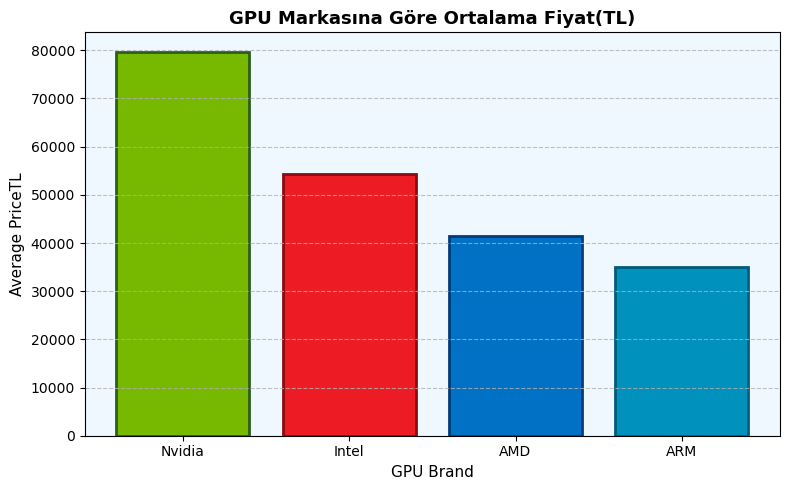

In [72]:
# GPU markasına göre ortalama fiyat
gpu_avg_price = df.groupby('Gpu_Brand')['PriceTL'].mean().sort_values(ascending=False)
bar_colors = ["#76B900", "#ED1C24", "#0071C5", "#0091BD"]  # Dolgu renkleri
edge_colors = ["#2D5C1F", "#8A0C12", "#003C75", "#005D7A"]  # Kenarlık renkleri
plt.figure(figsize=(8,5))
plt.bar(gpu_avg_price.index, gpu_avg_price.values, color=bar_colors, edgecolor=edge_colors, linewidth=2)
plt.title('GPU Markasına Göre Ortalama Fiyat(TL)', fontsize=13, fontweight='bold')
plt.xlabel('GPU Brand', fontsize=11)
plt.ylabel('Average PriceTL', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

<div class="alert alert-info alert-warning ">

# <span style=" color:red">Conclusions

<div class="alert alert-block alert-success">

Sonuç

Analiz sonucunda öne çıkan başlıca bulgular aşağıda özetlenmiştir:

Donanım Özellikleri:

RAM kapasitesi ve depolama türü (özellikle SSD ve hibrit çözümler) dizüstü bilgisayar fiyatlarını belirlemede en etkili faktörler arasında yer almaktadır.
Özellikle Yüksek RAM konfigürasyonları ile fiyat arasında güçlü ve pozitif bir korelasyon gözlemlenmiştir.
SSD ve hibrit bellek türü de fiyatı yükeselten önemli bir etkendir.

Ekran Özellikleri:

Yüksek çözünürlüklü ekranlar ve dokunmatik ekran özelliğine sahip dizüstü bilgisayarların fiyat ortalamasının üzerinde konumlandığı tespit edilmiştir.
Bu bulgu, ekran teknolojisinin fiyatı artıran önemli bir unsur olduğunu göstermektedir.

İşlemci ve Grafik Kartı Etkisi:

Performans odaklı Intel işlemciler fiyatı yukarı çekmektedir.
Oyun ve profesyonel kullanım odaklı dizüstü bilgisayarlarda, özellikle Intel i7 serisi işlemciler ve Nvidia GPU lar fiyatı anlamlı şekilde artırmaktadır.

Bilgisayar Türü Etkisi:

Workstation, Gaming ve Ultrabook türündeki cihazların yüksek fiyat segmentinde yer aldığı görülmüştür.

Ağırlık ve Taşınabilirlik:

Taşınabilirlik özellikleri de fiyatı etkileyen faktörler arasındadır. Özellikle Ultrabook ve 2-in-1 Convertible modeller, hafif yapıları ve yüksek taşınabilirlik özellikleri nedeniyle ortalamanın üzerinde fiyatlandırılmaktadır. Buna karşılık, daha büyük ve ağır kasalara sahip olan Gaming ve Workstation cihazlar yüksek performansa sahip oldukları için yine yüksek fiyat aralığında yer almaktadır.

Üst Düzey Dizüstü Bilgisayar Segmenti:

Fiyat dağılımının en üst %20 lik diliminde, Dell, Lenovo ve HP markalarının yoğunlaştığı görülmüştür.
Bu segmentteki cihazların çoğu yüksek RAM kapasitesine, SSD ve Hibrit depolama birimine, gelişmiş işlemcilere ve yüksek çözünürlüklü ekranlara güçlü grafik kartlarına sahiptir.
Ancak bu veri setindeki en yüksek fiyat segmentindeki cihazların büyük çoğunluğunda dokunmatik ekran özelliği bulunmamaktadır; bu da fiyat üzerinde etkili olan işlemci, RAM, GPU ve bellek türünün ağırlığını ortaya koymaktadır.


Çalışma sonucunda, dizüstü bilgisayar fiyatlarını belirleyen en kritik faktörlerin;
Donanım özellikleri; özellikle yüksek RAM kapasiteleri, SSD depolama çözümleri, gelişmiş işlemciler(CPU) ve güçlü grafik kartları(GPU) olduğu görülmektedir.

Not: Bu analiz yalnızca mevcut veri seti kapsamında gerçekleştirilmiştir. Daha geniş kapsamlı ve güncel verilerle yapılacak ek analizler, pazardaki eğilimlerin ve belirleyici faktörlerin daha net ortaya konmasını sağlayacaktır.

---

## 👥 Katılımcılar

- Ahmet Derya  
- Baris Gungor  
- Betul Gurlevik  
- Isilay Tamer  
- Kaan Altay  
- Mehmet Duzenli  
- Mehmet Enes Soyler  
- Meray Erzi  
- Mesut Karagöz  
- Muhammed Bakirtas  
- Nazgul Barpieva  
- Neslihan Bozkurt  
- Sule Demir  
- Yavuz Selim Kucukonder  
- Zaka Mikayilzade  

---

### 🎓 Proje Danışmanı  
**Huriye Buyukpancar**


![](https://www.techproeducation.com/logo/headerlogo.svg)
<img src="DS1_logo.jpg" alt="DS1 Logo" width="150"/>

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |